amostras_m:  [-3.2670774527381328, -3.602366441488247, -2.9900469807857606, -3.4563481364513122, -3.2302474946871658]
Média m (Gamma):  3.309217301230124 
Desvio Padrão (modelo DM):  0.20855003799370495 
Variância:  0.04349311834717577
Desvio padrão relativo:  6.302095601766054 %


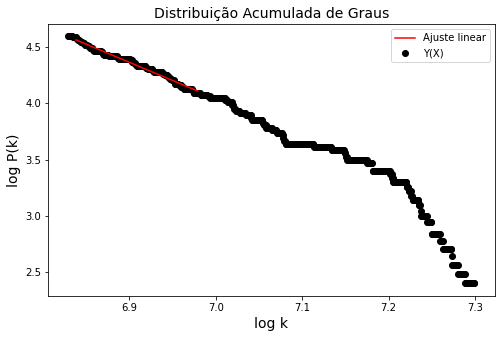

In [ ]:
# Código para geração de redes do tipo livres de escala através do modelo Dorogovtsev - Mendes (DM)

amostra = 0
amostras_m = []

while amostra < 5:

  # Bibliotecas

  import random
  import numpy as np
  import math
  import matplotlib.pyplot as plt

  # Configurações iniciais, definição dos parâmetros e criação das listas

  # Coeficientes
  a = 0.99 
  B = 0.72

  M_o = 2 # Para condição inicial (constante)
  N = 0 # variável para o crescimento da rede
  N_final = 1000 # Tamanho final da rede (tem a função de gerar as listas com os tamanhos necessários)
  f = 0.9 # f: fator de proporcionalidade. Tem a função de garantir que M < N sempre

  lista_k = [0]*N_final # Para armazenamento dos graus de cada vértice
  lista_adj = [0]*N_final # Para armazenamento das ligações de cada vértice

  lista_todas_prob = [0]*N_final # Armazenamento das probabilidades de cada vértice
  lista_soma_prob = [0]*N_final # Armazenamento da som das probabilidades para cada posição (utilizado para seleção das ligações do novo vértice)

  # contador para criação da lista_adj[] com o tamanho final da rede
  ite_n = 0

  # Cria uma lista com o tamanho desejado do sistema
  while ite_n < N_final:
    lista_adj[ite_n] = [ite_n] # Em cada posição da lista_adj[] será criada uma outra lista com um único item, de acordo com a numeração ite_n
    ite_n += 1

 # Passo (1): condição inicial da rede

 # Contadores
  ite_m = 0
  ite_m2 = 0 

  # Gera a condição inicial (T=0) 
  while ite_m < M_o:
    ite_m2 = ite_m + 1
  
    while ite_m2 < M_o + 1: # Pois o número inicial de vértices existentes (N_o = M_o + 1) precisa ser maior do que M_o. ite_m2 faz o papel de N_o.
      # Atualiza as ligações entre dois vértices
      lista_adj[ite_m].append(ite_m2)
      lista_adj[ite_m2].append(ite_m) 

      # Atualiza os graus dos vértices que foram ligados
      lista_k[ite_m] = lista_k[ite_m] + 1
      lista_k[ite_m2] = lista_k[ite_m2] + 1

      ite_m2 += 1
    ite_m += 1

  # Cálcula a probabilidade de conexão associada a cada vértice que já está na rede
  def calcula_prob(ite_n): # O parâmetro recebido 'ite_n' diz a função quandos vértices já fazem parte da rede a cada iterada 
    soma_prob = 0
    ite_p = 0 # contador

    while ite_p < ite_n: # O percorrimento desse 'while' aumenta a cada iterada a medida que o variável associada ao tamanho da rede atual (ite_n) aumenta
      prob = float((lista_k[ite_p]) + B * (ite_n ** a))/(float(sum(lista_k)) + float(ite_n * B * (ite_n ** a))) 
      lista_todas_prob[ite_p] = prob # Armazena a probabilidade de conexão (conectividade Ki) do vértice na posição 'ite_p'
      soma_prob = soma_prob + prob
      lista_soma_prob[ite_p] = soma_prob # Armazena a soma das probabilidades atual para cada vértice na posição 'ite_p'. A soma acumulada aumenta com ite_p, 
                                       # de maneira que menores índices de probabilidade acumulada (posições iniciais em 'lista_todas_prob[]) favoreçam os vértices iniciais
      ite_p += 1

  # Função que procura com quem o vértice que está entrando na rede irá se conectar. 
  # É esta função que caracteriza a regra da ligação preferencial
  def encontra_v2(ite_n, prob_v2):
    ite_n2 = 0 # Contador para indexar a posição na lista 'lista_soma_prob'

    while ite_n2 < ite_n: # Percorre no máximo o tamanho da lista de acordo com a quantidade atual de elementos (ite_n)
      if lista_soma_prob[ite_n2] >= prob_v2: # ALTERAR ESTA CONDIÇÃO. PERCORRER A LISTA SOMA_PROB OU LISTA_TODAS_PROB POR ÍNDICES DE MAIOR PROBEBILIDADE PRIMEIRO, E NAO ordenado
        return ite_n2
      ite_n2 += 1    

  # Passo (2) - laço principal: iteração das regras de conexão

  ite_n = M_o + 1 # 'ite_n' fará o papel de N (atual da rede)

  while ite_n < N_final: # Executado enquanto 'ite_n' (que representa o N atual) seja menor do que o 'N_final' (tamanho final da rede)
    M = M_o + math.floor(f * (ite_n**a)) # Expressão para M (grau médio da rede) que será atualizado a medida que a rede cresce (variável com N). 
                                               # Se a=0, M = M_o (modelo BA clássico).
    v1 = ite_n # Vértice que está entrando na rede
    calcula_prob(ite_n) # Calcula a probabilidade associada a cada vértice que está na rede de receber ligações do vértice que entrou a cada iterada e armazena esses valores
  
    ite_m = 0 # Contador

    while ite_m < M: # Bloco executado sempre M vezes 
      prob_v2 = random.random() # Número aleatório entre 0-1 (para comparação com v2 na função 'encontra_v2')
      v2 = encontra_v2(ite_n, prob_v2) # Vértice da rede escolhido através da execução da função 'encontra_v2' para receber ligação do vértice que está entrando (v1)

      while v2 in lista_adj[v1]: # Este laço evita autoarestas e limitam os vértices a terem no máximo uma ligação entre si
        prob_v2 = random.random()
        v2 = encontra_v2(ite_n, prob_v2)

      # Adiciona na posição [v2] (que é uma lista por sí só dentro da lista_adj[]) o valor v1
      lista_adj[v2].append(v1) # Mesmo processo acima, porém, ao contrário
  
      # Atualiza os gráus dos vértices em questão nas posições v2
      lista_k[v2] = lista_k[v2] + 1

      ite_m += 1
    # print('M = ',  M, 'N = ', ite_n)
    ite_n += 1

  # Passo (3) - Extração de dados da rede

  max_k = max(lista_k) # Armazena na variável o maior valor da lista_k[]
  histograma_k = [0]*(max_k + 1) # Criar a quantidade de posições na lista histograma_k necessárias para o armazenamento
  soma_histograma_k = [0]*(max_k + 1)

  ite_n = 0

  while ite_n < N_final:
    histograma_k[lista_k[ite_n]] = histograma_k[lista_k[ite_n]] + 1 # Armazena em cada posição da lista histograma_k[] a quantidade de vértices que possuem tal grau. 
                                                                  # Cada posição na lista histograma_k[] significa o valor do grau. [0] grau zero; [1] grau 1...
                                                                  # Exemplo: [0,5,2,7,10,8] a posição [3] (grau 3) possui 7 vértices com grau 3
    ite_n += 1

  # Plot do histograma

  k = [] # Lista que armazenara os valores dos graus
  i = 0

  for i in range(len(histograma_k)):
    soma_histograma_k[i] = sum(histograma_k[i+1:]) # soma, em cada posição 'i' a quantidade de vértices presentes na rede que possuem mais 
                                                 # do que 'i' conexões (probabilidade de sobrevivencia)
    k.append(i + 1) # +1 para sincronizar a lista 'k' com 'histograma_k'
    i += 1

  """Filtragem da lista 'k' e 'histograma_k'
     Necessária para eliminar elementos nulos na lista histograma_k e remover nesses mesmos índices os elementos da lista 'k'.
     Assim, teremos as duas listas apenas com os graus e a quantidades de vértices com tais graus existentes, eliminando valores
     nulos, de maneira a evitar erros na regressão linear."""

  # Convertendo 'k' e 'histograma_k' em um array NumPy. X = k ; Y = histograma_k
  X = np.array(k)
  Y = np.array(soma_histograma_k)

  # Mapeia quais índices em Y possuem valor 0 ou N_final - 5 e armazena em 'indexes'. 'indexes' é uma lista que armazena as posições que possuem o valor 0
  indexes = np.where((Y == 0) | (Y >= math.ceil(0.1*N_final)) | (Y <= math.ceil(0.01*N_final)))

  # Remove das listas X e Y os índices que possuem elementos 0 da lista Y. Argumentos da função 'delete(arr, obj, axis)'
  X = np.delete(X, indexes)
  Y = np.delete(Y, indexes)

  X1 = np.log(X)
  Y1 = np.log(Y)

  X = X1
  Y = Y1

  # Cálculo da regressão linear 

  # Parâmetros para ajuste de regressão (P: limite inferior, Q: limite superior)
  P = 8
  Q = 150

  media_X = np.mean(X[P:Q])
  media_Y = np.mean(Y[P:Q])

  erro_X = X[P:Q]-media_X
  erro_Y = Y[P:Q]-media_Y

  soma_erro_XY = np.sum(erro_X*erro_Y)
  erro_X_quadratico = (X[P:Q]-media_X)**2.0
  soma_erro_X_quadratico = np.sum(erro_X_quadratico)

  m = soma_erro_XY / soma_erro_X_quadratico 
  #print("Coeficiente angular = {:0.2f}".format(m))

  c = media_Y - m*media_X
  #print("Coeficiente linear = {:0.2f}".format(c))

  amostras_m.append(m)

  amostra += 1

print('amostras_m: ', amostras_m)
print('Média m (Gamma): ',np.abs(np.mean(amostras_m)), '\nDesvio Padrão (modelo DM): ', np.std(amostras_m), '\nVariância: ', np.var(amostras_m))
print('Desvio padrão relativo: ', np.abs((np.std(amostras_m)/(np.mean(amostras_m))) * 100), '%')

reta = m*X+c

# Gráfico da regressão linear
plt.figure(figsize =(8,5))
plt.scatter(X,Y,label='Y(X)', color='black');
plt.plot(X[P:Q],reta[P:Q],label='Ajuste linear',color='red');
plt.title('Distribuição Acumulada de Graus', fontsize = 14)
plt.xlabel('log k', fontsize = 14);
plt.ylabel('log P(k)', fontsize = 14);
plt.legend();
